<h1><center> Multilayer Perceptron for the MNIST dataset </center></h1>

# Theoretical info
A **Multilayer Perceptron** (MLP) is the name for a modern *feedforward neural network* consisting of *fully connected neurons* with *nonlinear activation functions*, *organized in layers*, notable for being able to distinguish data that is not linearly separable.  

## Architecture of Multi-Layer Perceptron Classifier
  
1. *Input Layer*: This layer is composed of neurons that receive the features of the dataset. Each neuron in the input layer represents a specific feature of the data. The number of neurons in the input layer equals the number of features in the dataset.
  
2. *Hidden Layer*: One or more hidden layers may exist between the input and output layers. The number of hidden layers and neurons in each hidden layer is determined by hyperparameters
  
3. *Output Layer*: The final predictions or outputs are generated by the output layer using the data processed in the hidden levels.
  
<center>
  <img src="https://media.datacamp.com/legacy/v1725638284/image_bd3b978959.png" alt="MLP with two hidden layers" width="500"/>
</center>

In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# Data Preprocessing
  
Before we start training an MLP model, we need to have the correct training and testing data.  
  
The **MNIST database** consists of handwritten digits and has a training set of 60,000 examples, and a test set of 10,000 examples.
- The *input features* are represented by pixels in of 28 x 28 pixel grayscale images.
- The *target variable* is numerical and categorical, consisting of the values of digits 0 - 9.

## Import the MNIST dataset

In [6]:
# Import the MNIST dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

**Extracted data**:  
  
`x_train`: `uint8` NumPy array of grayscale image data with shapes `(60000, 28, 28)`, containing the training data. Pixel values range from 0 to 255.
  
`y_train`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(60000,)` for the training data.
  
`x_test`: `uint8` NumPy array of grayscale image data with shapes `(10000, 28, 28)`, containing the test data. Pixel values range from 0 to 255.
  
`y_test`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(10000,)` for the test data.

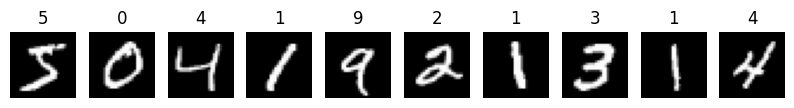

In [7]:
# Display first few entries in the training dataset, alongside their labels

num_images = 10
plt.figure(figsize=(10, 1))

for i in range(num_images):
  plt.subplot(1, num_images, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title(str(y_train[i]))

plt.show()

## Normalize pixel data and flatten images

In [8]:
# Normalize input data to values between 0 and 1 and flatten images to vectors

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

assert x_train.shape == (60000, 784)
assert x_test.shape == (10000, 784)

**Processed data**:
  
`x_train`: `float32` NumPy array of grayscale image data with shapes `(60000, 784)`, containing the training data. Pixel values range from 0 to 1.
  
`y_train`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(60000,)` for the training data.
  
`x_test`: `float32` NumPy array of grayscale image data with shapes `(10000, 784)`, containing the test data. Pixel values range from 0 to 1.
  
`y_test`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(10000,)` for the test data.

# Training an MLP using Scikit-learn

The `sklearn.neural_network` package offers a multilayer perceptron training through the class `MLPClassifier`. For the experiment below I use the following configuration:
  
- `hidden_layer_sizes=(128, 64)` - Two hidden layers, with 128 and 64 neurons respectively.
  
- `activation='relu'` - Activation function is *Rectified Liniar Unit*, having the formula $f(x) = max(0, x)$.
  
- `solver='adam'` - *Adaptive Moment Estimation*, stochastic gradient-based optimizer (as proposed by *Kingma, Diederik, and Jimmy Ba*) for weight optimization.
  
- `batch_size='64'` - Size of minibatches (for stochastic optimizers) represents the number of samples analyzed together before the model parameters (weights and biases) are updated.
  
- `max_iter=1000` - The solver iterates until convergence (determined by the tolerance `tol` -  defaulted to `1e-4`) or until this maximum number of iterations is reached. This determines the *number of epochs* (how many times each data point will be used), not necessarly the number of gradient steps.

In [76]:
# Training a basic MLPClassifier using Scikit-learn

from sklearn.neural_network import MLPClassifier
import time

mlp = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver='adam', batch_size=64, max_iter=200, random_state=42)

start_time = time.time()
mlp.fit(x_train, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time}")

Training time: 123.9195601940155


In [78]:
# Training accuracy

from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

Training Accuracy: 99.48%


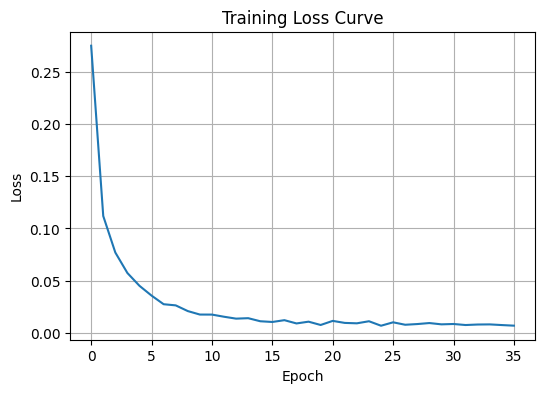

In [81]:
# Plotting the training loss curve

plt.figure(figsize=(6, 4))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

We can see that the model converged after 35 epochs and the loss followed an exponential distribution.

In [82]:
# Test accuracy

y_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.56%


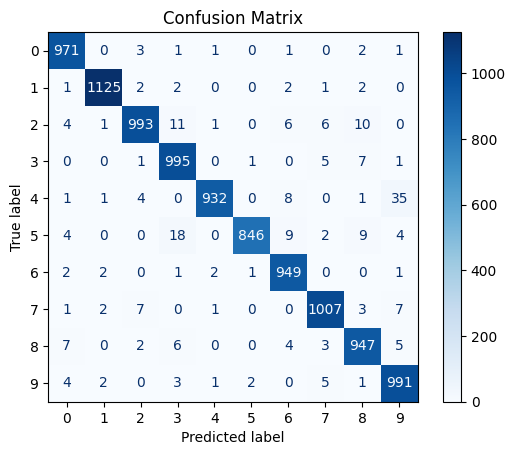

In [83]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Training an MLP using Tensorflow

The tensorflow.keras library offers a multilayer perceptron training through the class `Sequential`. For the experiment below I use the following **model configuration**:  
  
- `layers.Input(shape=(784,))`: Input layer.  
  
- `layers.Dense(128, activation='relu')`, `layers.Dense(64, activation='relu')`: Fully connected hidden layers which use the Rectified Liniar Unit activation function.
  
- `layers.Dense(10, activation='softmax')`: Output layer, which uses the Softmax activation function to transform output values into probabilities.

In [3]:
# Build a tensorflow MLP model with 2 hidden layers

from keras import layers

model = keras.Sequential([
  layers.Input(shape=(784,)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Following the model configuration is the oprimizer, for which I use Adam (as previously). For the experiment below I use the following **optimizer configuration**:  
  
- `learning_rate=0.001`: The default leraning rate. It controls the size of a step taken when updating model weights during training.
  
For the model compilation I use the following **compiltaion configuration**:  
  
- `optimizer=optimizer`: Adam optimizer with set learning rate.
  
- `loss='sparse_categorical_crossentropy'`: Computes the probabilistic loss between the labels and predictions. The sparce version is used since the label data is stored as indexes.
  
- `metrics=['accuracy']`: Use accuracy to evaluate performance of the model. Does not affect training.

In [4]:
# Compile the model
from keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

For the training part, I use the following **training configuration**:  
  
- `validation_split=0.2`: Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
  
- `epochs=20`: Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
  
- `batch_size=64`: Number of samples per gradient update.

In [9]:
# Train the model

history = model.fit(
  x_train, y_train,
  validation_split=0.2,
  epochs=20,
  batch_size=64
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8443 - loss: 0.5409 - val_accuracy: 0.9466 - val_loss: 0.1740
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9555 - loss: 0.1444 - val_accuracy: 0.9585 - val_loss: 0.1414
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9718 - loss: 0.0934 - val_accuracy: 0.9685 - val_loss: 0.1043
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9814 - loss: 0.0643 - val_accuracy: 0.9712 - val_loss: 0.0917
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0506 - val_accuracy: 0.9741 - val_loss: 0.0891
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9886 - loss: 0.0386 - val_accuracy: 0.9716 - val_loss: 0.0946
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9736 - val_loss: 0.0998
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9933 - loss: 0.0232 - val_accuracy: 0.

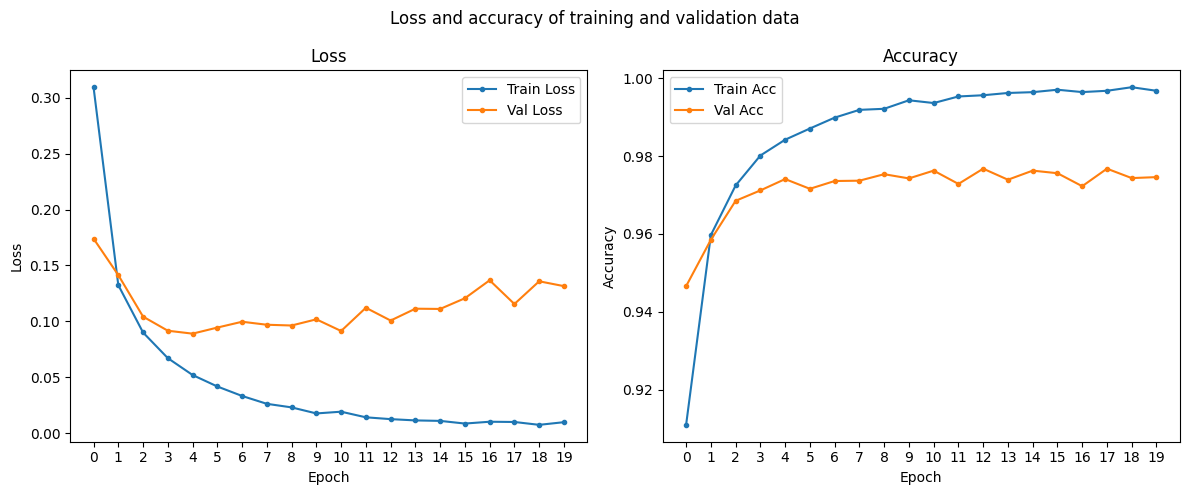

In [51]:
# Plot accuracy and loss for training and validation data

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
fig.suptitle("Loss and accuracy of training and validation data")

ax[0].plot(history.history['loss'], label='Train Loss', marker='.')
ax[0].plot(history.history['val_loss'], label='Val Loss', marker='.')
ax[0].set_xticks(range(20))
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Acc', marker='.')
ax[1].plot(history.history['val_accuracy'], label='Val Acc', marker='.')
ax[1].set_xticks(range(20))
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

**Observations**:  
By analyzing the loss and accuracy of the training and validation data side by side we see the following:
  
- While the training performance increases, the validation data sees an *increase in loss* and *relative stagnation in accuracy*.
  
- This indicates that we have slight *overfitting* in the model, and we might see better performance by changing some hyperparameters.

In [52]:
# Printing test accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1484
Test Accuracy: 97.54%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


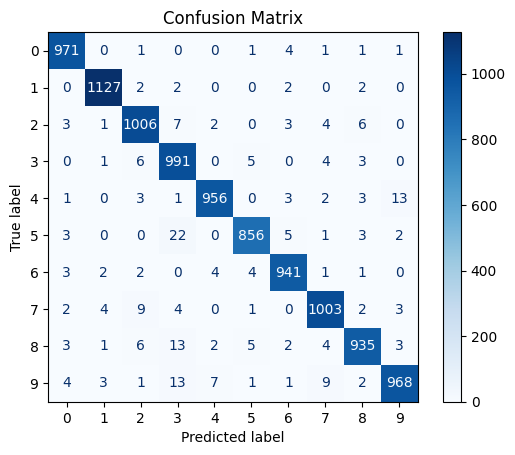

In [55]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

We see simular accuracy to that of the validation data.  
Next, let us run some more experiments, using different configurations, in order to hopefully find a better performing model.

In [90]:
# Function for running a model with different parameters on the MNIST data

import time

def run_model(learning_rate=0.001, validation_split=0.2, epochs=20, batch_size=64):
  '''
    Builds and compiles a MLP with given hyperparameters and then trains the model with the MNIST data
  '''

  # Build model
  model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

  # Compile model
  optimizer = optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train model
  print(f"Training model with learning rate = {learning_rate}, validation split = {validation_split}, epochs = {epochs}, batch size = {batch_size}")
  start_time = time.time()

  history = model.fit(
    x_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size=batch_size,
    verbose=0
  )

  end_time = time.time()
  print(f"Total training time: {end_time - start_time}")

  # Return History object
  return model, history

In [91]:
# Function for evaluating a model with different parameters on the MNIST data

def evaluate_model(model, epochs, history):
  '''
    Plots the loss and accuracy of training and validation data based on the given model history and evaluates model on test data
  '''
  
  # Plot loss and accuracy
  fig, ax = plt.subplots(1, 2)
  fig.set_figheight(5)
  fig.set_figwidth(12)

  ax[0].plot(history.history['loss'], label='Train Loss', marker='.')
  ax[0].plot(history.history['val_loss'], label='Val Loss', marker='.')
  ax[0].set_xticks(range(epochs))
  ax[0].set_title('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].grid(axis='y')
  ax[0].legend()

  ax[1].plot(history.history['accuracy'], label='Train Acc', marker='.')
  ax[1].plot(history.history['val_accuracy'], label='Val Acc', marker='.')
  ax[1].set_xticks(range(epochs))
  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].grid(axis='y')
  ax[1].legend()

  plt.tight_layout()
  plt.show()

  # Print test accuracy
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f"Test Accuracy: {test_acc*100:.2f}%")

## Testing model performance for different parameter configurations

```python
learning_rate = 0.0005
validation split = 0.2
epochs = 20
batch size = 64
```

Training model with learning rate = 0.0005, validation split = 0.2, epochs = 20, batch size = 64
Total training time: 41.262259006500244


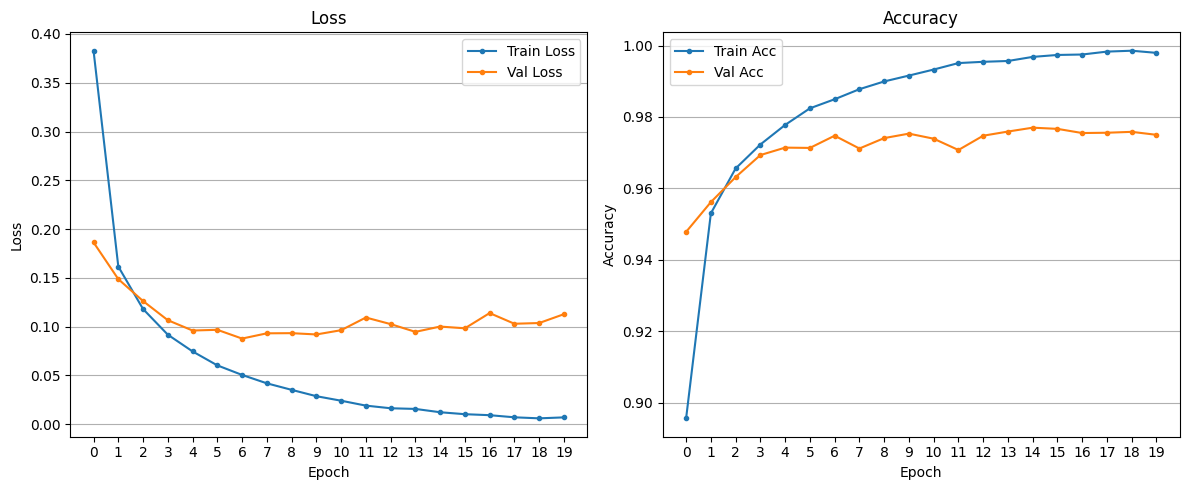

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.1134
Test Accuracy: 97.52%


In [87]:
model, history = run_model(learning_rate=0.0005, validation_split=0.2, epochs=20, batch_size=64)
evaluate_model(model, 20, history)

After decreasing the learining rate, we see better performance overall. There is still some slight overfitting at action.  
Let's try decreasing the batch size.

```python
learning_rate = 0.0005
validation split = 0.2
epochs = 20
batch size = 32
```

Training model with learning rate = 0.0005, validation split = 0.2, epochs = 20, batch size = 32
Total training time: 74.79461121559143


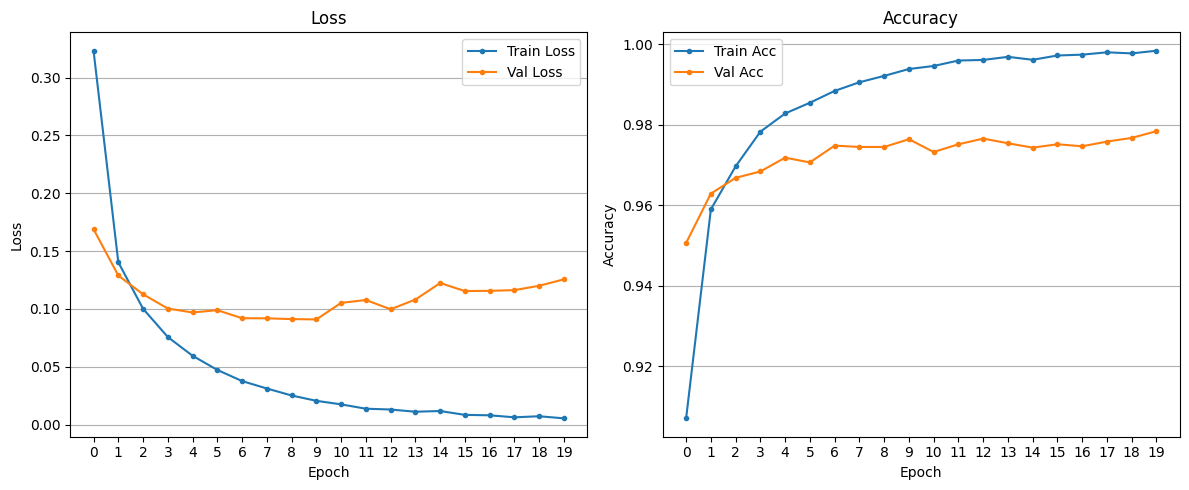

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.1264
Test Accuracy: 98.02%


In [88]:
model, history = run_model(learning_rate=0.0005, validation_split=0.2, epochs=20, batch_size=32)
evaluate_model(model, 20, history)

We see very good performance with a decreased batch size, while the execution time is slightly higher.  
Let's try decreasing the validation split, to allow training on more data.

```python
learning_rate = 0.0005
validation split = 0.1
epochs = 20
batch size = 32
```

Training model with learning rate = 0.0005, validation split = 0.1, epochs = 20, batch size = 64
Total training time: 42.87127423286438


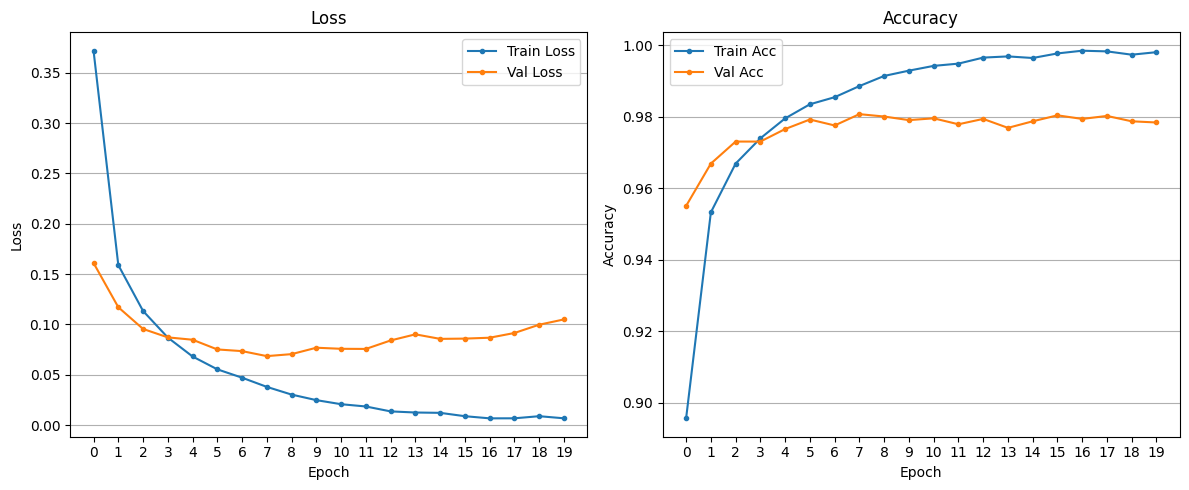

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.1039
Test Accuracy: 97.80%


In [89]:
model, history = run_model(learning_rate=0.0005, validation_split=0.1, epochs=20, batch_size=64)
evaluate_model(model, 20, history)

We see good performance here, with less overfitting and a more stable accuracy between the final epochs.  
The accuracy does not increase significantly after a while, so let's try decreasing the number of epochs.

```python
learning_rate = 0.0005
validation split = 0.1
epochs = 10
batch size = 32
```

Training model with learning rate = 0.0005, validation split = 0.1, epochs = 10, batch size = 64
Total training time: 19.364542722702026


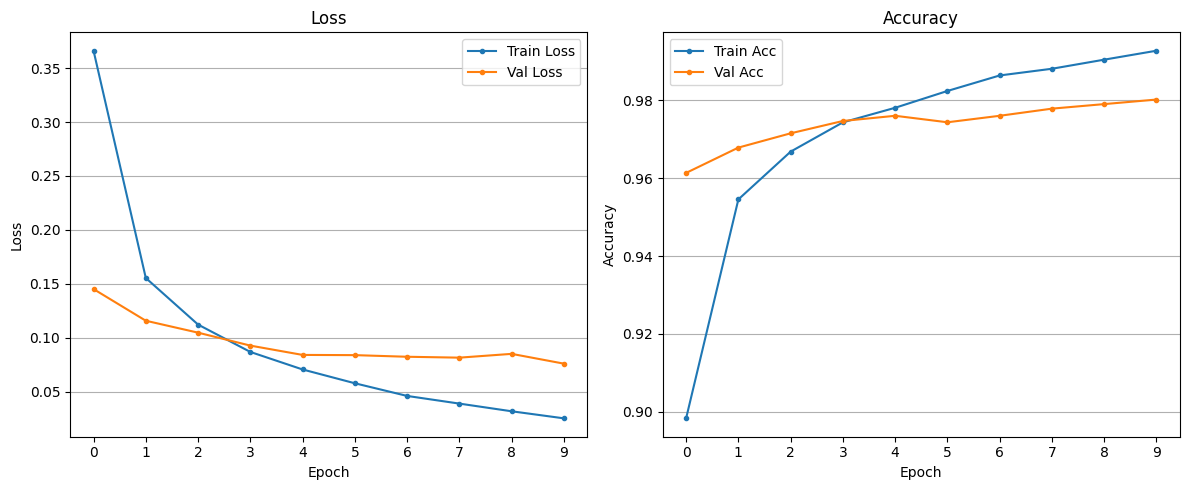

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0908
Test Accuracy: 97.84%


In [85]:
model, history = run_model(learning_rate=0.0005, validation_split=0.1, epochs=10, batch_size=64)
evaluate_model(model, 10, history)

We have a very satisfactory result in much lower execution time now.

# Model comparison

Let's see how the MLP model trained using `Scikit-learn` compares to the one trained using `Tensorflow` and `Keras`.

### Overview
| Model | Max. accuracy | Training time | Model flexibility |
| --- | --- | --- | --- |
| Scikit-learn | 97.56% | 123.9s | flexible |
| Tensorflow | 98.02% | 75.2s | very flexible |

### Comments
- In terms of **implementation**, `Scikit-learn` offers a very straightforward and easy to implement interface, whereas `Keras` offers a highly customizable, but slightly harder to implement interface.
  
- In terms of **interpretability**, I found that the `Tensorflow` version is highly interpretable, I could better detect overfitting and I found parameter tuning more starightforward.
  
- In terms of **performance**, both models offer very good results for the MNIST problem and similar accuracy and loss. However, in terms of execution time, the `Keras` model is much faster.